In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [4]:
from sklearn.model_selection import train_test_split
x, y = make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)

In [6]:
x.shape

(2000, 20)

In [8]:
y.shape

(2000,)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

# Randomforest

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_train_pred = rf_model.predict_proba(x_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred=rf_model.predict_proba(x_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test,y_test_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9829833333333333


# Logistic Regration

In [17]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(x_train,y_train)
y_train_pred = log_classifier.predict_proba(x_train)
print('Logistic train roc - auc: {}'.format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred = log_classifier.predict_proba(x_test)
print('Logistic test roc - auc: {}'.format(roc_auc_score(y_test,y_test_pred[:,1])))

Logistic train roc - auc: 0.9863568922694498
Logistic test roc - auc: 0.9885777777777777


# Adaboost Classifier

In [19]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(x_train,y_train)
y_train_pred=ada_classifier.predict_log_proba(x_train)
print("Adaboost train roc - auc: {}".format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred=ada_classifier.predict_log_proba(x_test)
print("Adaboost test roc - auc: {}".format(roc_auc_score(y_train,y_train_pred[:,1])))

Adaboost train roc - auc: 0.9975081174960356
Adaboost test roc - auc: 0.9975081174960356


# KNN Classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(x_train,y_train)
y_train_pred=knn_classifier.predict_proba(x_train)
print("KNN train roc - auc: {}".format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred=knn_classifier.predict_proba(x_test)
print("KNN Test roc - auc: {}".format(roc_auc_score(y_test,y_test_pred[:,1])))

KNN train roc - auc: 0.981670071491109
KNN Test roc - auc: 0.9426111111111111


In [22]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc - auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc - auc: 0.9847333333333333


In [23]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.02,0.000008,0.463282,0.0
2,0.99,0.966929,0.538202,0.8
3,0.90,0.761539,0.509875,0.8
4,0.54,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.04,0.000003,0.441377,0.0
597,0.97,0.984385,0.532403,1.0
598,0.00,0.001147,0.441720,0.2


In [24]:
final_prediction

0      0.885262
1      0.120823
2      0.823783
3      0.742853
4      0.552447
         ...   
595    0.121340
596    0.120345
597    0.871697
598    0.160717
599    0.832357
Length: 600, dtype: float64

In [27]:
# Calculate the ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91188114, 0.91188114, 0.90123256, 0.90077475, 0.80452418,
       0.80412833, 0.80377646, 0.8030558 , 0.78880736, 0.78821156,
       0.77047605, 0.77037124, 0.72710041, 0.72637362, 0.70657482,
       0.70393711, 0.67538086, 0.67243537, 0.61744697, 0.61614346,
       0.60616701, 0.60175354, 0.5921569 , 0.58486186, 0.57827749,
       0.57300386, 0.55244674, 0.54719563, 0.54105932, 0.53127948,
       0.51865858, 0.47116892, 0.4521034 , 0.37434818, 0.37379719,
       0.35807343, 0.35086612, 0.23904122, 0.23390421, 0.21213088,
       0.21146893, 0.20483682, 0.20348417, 0.1231704 , 0.1228351 ,
       0.10632697])

In [29]:
from sklearn.metrics import accuracy_score
accuracy_ls=[]
for thres in thresholds:
    y_pred= np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred,normalize=True))
accuracy_ls = pd.concat([pd.Series(thresholds),pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns=['thresholds','accuracy']
accuracy_ls.sort_values(by='accuracy',ascending=False,inplace=True)
accuracy_ls.head()

,thresholds,accuracy
32,0.452103,0.961667
31,0.471169,0.958333
29,0.531279,0.958333
28,0.541059,0.958333
27,0.547196,0.958333


In [35]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1], color='darkblue',linestyle= '--')
    plt.xlabel('False positive Rate')
    plt.ylabel('True positive Rate')
    plt.title('Receiver operating characteristic (ROC) curve')
    plt.legend()
    plt.show()

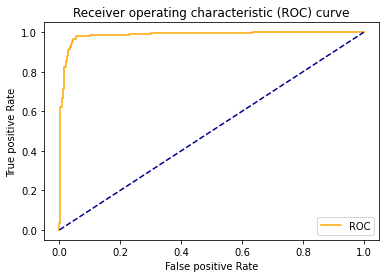

In [36]:
plot_roc_curve(fpr,tpr)